In [ ]:
#importing all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Reading dataset with help of pandas library and looking to top 5 records
data=pd.read_csv("/content/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
#replacing key as value
values={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
data["cap-shape"]=data["cap-shape"].replace(values)

In [ ]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,convex,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,convex,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,bell,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,convex,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,convex,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
#checking here null value
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
#converting independent features into numerical values
x=data.drop('class',axis=1)
x=pd.get_dummies(x)

In [ ]:
x.head()

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#seperating dependent feature
y=data['class']
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [ ]:
data['class']

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [ ]:
mush={'p':0,'e':1}
data['class']=[mush[item] for item in data['class']]

In [ ]:
y=data['class']
y.head()

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [ ]:
#independent and dependent features apply trian test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

In [ ]:
#creating call back function to early stop purpose
from keras import callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=20, 
    restore_best_weights=True
)


In [ ]:
#importing and building ANN model
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(units = 128, kernel_initializer = 'he_normal', activation = 'relu', input_dim = 117))
model.add(Dropout(0.5))
model.add(Dense(units = 64, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dense(units = 8, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])



In [ ]:
# Train the ANN
history = model.fit(x_train, y_train, batch_size = 8, epochs = 100, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
488/488 [==============================] - 3s 4ms/step - loss: 0.6171 - accuracy: 0.6355 - val_loss: 0.4178 - val_accuracy: 0.9087
Epoch 2/100
488/488 [==============================] - 2s 3ms/step - loss: 0.4280 - accuracy: 0.7879 - val_loss: 0.2025 - val_accuracy: 0.9538
Epoch 3/100
488/488 [==============================] - 1s 3ms/step - loss: 0.3114 - accuracy: 0.8610 - val_loss: 0.1188 - val_accuracy: 0.9785
Epoch 4/100
488/488 [==============================] - 1s 3ms/step - loss: 0.2516 - accuracy: 0.8884 - val_loss: 0.0811 - val_accuracy: 0.9867
Epoch 5/100
488/488 [==============================] - 1s 3ms/step - loss: 0.2056 - accuracy: 0.9223 - val_loss: 0.0587 - val_accuracy: 0.9856
Epoch 6/100
488/488 [==============================] - 1s 3ms/step - loss: 0.1894 - accuracy: 0.9356 - val_loss: 0.0429 - val_accuracy: 0.9877
Epoch 7/100
488/488 [==============================] - 1s 3ms/step - loss: 0.1731 - accuracy: 0.9497 - val_loss: 0.0333 - val_accuracy: 0.9928

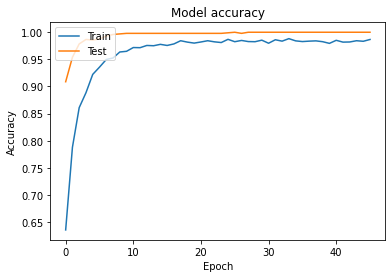

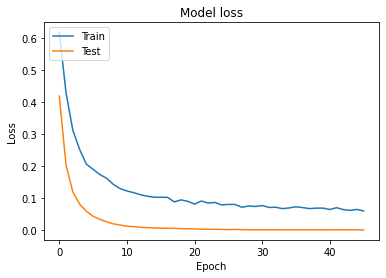

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
# Predicting the test set results
#classification Report will get accuracy ,precision ,recall
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))

102/102 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1572
           1       1.00      1.00      1.00      1678

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



In [ ]:
#confusion matrix will able to check accuracy
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1572    0]
 [   0 1678]]
1.0
